In [4]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import os
os.chdir('C:\\Users\\Naveen Kumar\\Desktop\\artificial intelligence\\excel files')
df=pd.read_csv('final.csv')
def xy(r):
    d=[]
    global a,b
    for i in range(1,r+1):
        if(r%i==0):
            d.append(i)
    if len(d)%2==0:
        a=d[int(len(d)/2-1)]
        b=d[int(len(d)/2)]
    df1=pd.DataFrame(index=list(np.arange(r)),columns={'Yrows','Xcols'})
    j,k=0,0
    while(k<=b-1):
        for i in range(b):
            df1['Yrows'][j]=k
            df1['Xcols'][j]=i
            j=j+1
        k=k+1
    return(df1)
df=df.join(xy(len(df)))
df.drop(['Unnamed: 0','lastPrice', 'totalBuyQuantity','totalSellQuantity','Time'],axis=1,inplace=True)
symbol=(np.asarray(df['symbol'])).reshape(a,b)
Times=(np.asarray(df['Times'])).reshape(a,b)
result=df.pivot(index='Yrows',columns='Xcols',values='Times')
labels=(np.asarray(["{0} \n {1:.7f}".format(symb,times) for symb,times in zip(symbol.flatten(),Times.flatten())])).reshape(a,b)

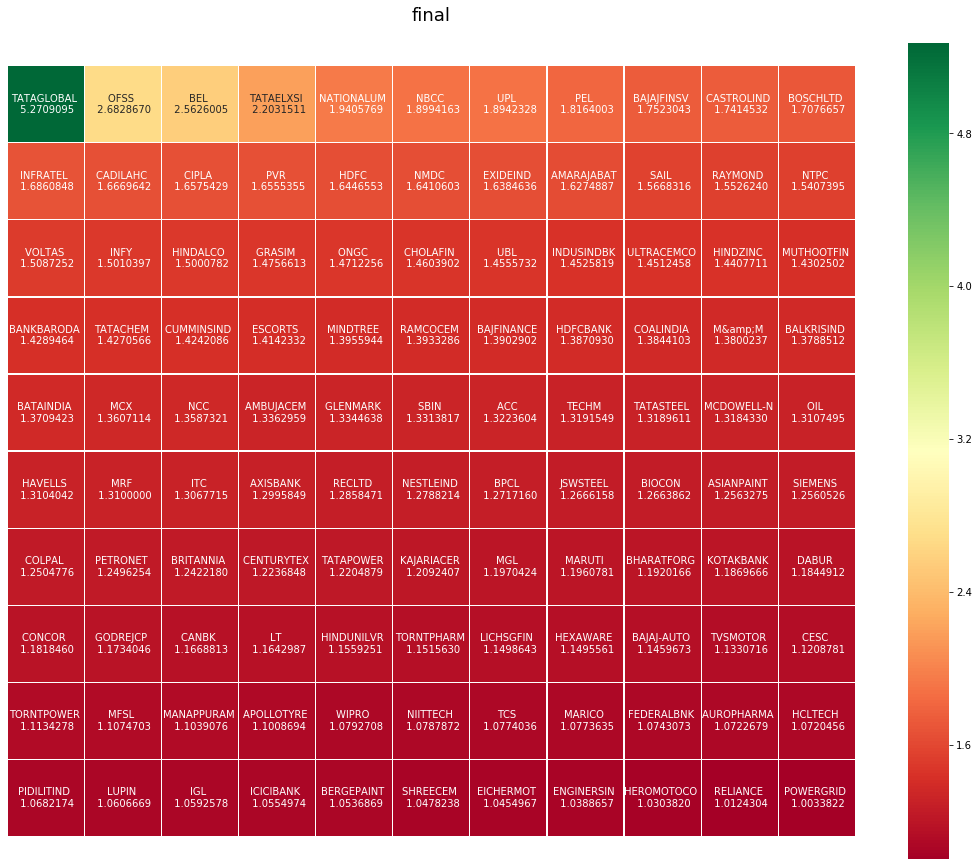

In [5]:
fig,ax=plt.subplots(figsize=([19,15]))


#Set the font size and the distance of the title from the plot
plt.title('final',fontsize=18)
ttl=ax.title
ttl.set_position([0.5,1.05])


ax.set_xticks([])
ax.set_yticks([])

#remove the axis
ax.axis('off')
#Use the heatmap function from the seaborn package

sn.heatmap(result,annot=labels,fmt="",annot_kws={"size": 10},cmap="RdYlGn",linewidth=0.30,square=True,ax=ax)

#display final
plt.show()

In [6]:
df

,symbol,Times,Yrows,Xcols
0,TATAGLOBAL,5.270910,0,0
1,OFSS,2.682867,0,1
2,BEL,2.562601,0,2
3,TATAELXSI,2.203151,0,3
4,NATIONALUM,1.940577,0,4
5,NBCC,1.899416,0,5
6,UPL,1.894233,0,6
7,PEL,1.816400,0,7
8,BAJAJFINSV,1.752304,0,8
9,CASTROLIND,1.741453,0,9
